In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Operations')

In [ ]:
files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Operations')

In [ ]:
files

['Month wise service data 2021-22.xlsx',
 'Monthwsie service data 2022-23.xlsx',
 'Monthwise service data 2020-21.xlsx',
 'Month wise service data 2019-20.xlsx']

In [ ]:
final = pd.DataFrame(columns = ['District','Facility Code','Facility Name','Month','Deliveries_Count','C-Section_Deliveries'])

In [ ]:
for file in files:
  data = pd.read_excel(file)
  data = data[['District Name','Facility Code','Facility Name','Month','2.1 :: Number of Institutional Deliveries conducted (Including C-Sections)','3.1 :: Total C -Section deliveries performed']]
  data.columns = ['District','Facility Code','Facility Name','Month','Deliveries_Count','C-Section_Deliveries']
  frames = [final,data]
  final = pd.concat(frames,ignore_index=True)

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              1379 non-null   object 
 1   Facility Code         1373 non-null   object 
 2   Facility Name         1373 non-null   object 
 3   Month                 1371 non-null   object 
 4   Deliveries_Count      1315 non-null   float64
 5   C-Section_Deliveries  1314 non-null   float64
dtypes: float64(2), object(4)
memory usage: 65.0+ KB


In [ ]:
final.head(6)

,District,Facility Code,Facility Name,Month,Deliveries_Count,C-Section_Deliveries
0,Anantapur,451648.0,GGH Anathapuramu,Apr-2021,710.0,316.0
1,Anantapur,451648.0,GGH Anathapuramu,May-2021,698.0,327.0
2,Anantapur,451648.0,GGH Anathapuramu,Jun-2021,742.0,303.0
3,Anantapur,451648.0,GGH Anathapuramu,Jul-2021,753.0,307.0
4,Anantapur,451648.0,GGH Anathapuramu,Aug-2021,783.0,291.0
5,Anantapur,451648.0,GGH Anathapuramu,Sep-2021,911.0,376.0


In [ ]:
final_Anak = final[final['Facility Code']==451648]

In [ ]:
pd.unique(final_Anak['Facility Name'])

array(['GGH Anathapuramu'], dtype=object)

In [ ]:
final_Anak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 764
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              36 non-null     object 
 1   Facility Code         36 non-null     object 
 2   Facility Name         36 non-null     object 
 3   Month                 36 non-null     object 
 4   Deliveries_Count      35 non-null     float64
 5   C-Section_Deliveries  35 non-null     float64
dtypes: float64(2), object(4)
memory usage: 2.0+ KB


<ipython-input-12-ab7a8976a29a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_Anak['Month'] = pd.to_datetime(final_Anak['Month'])


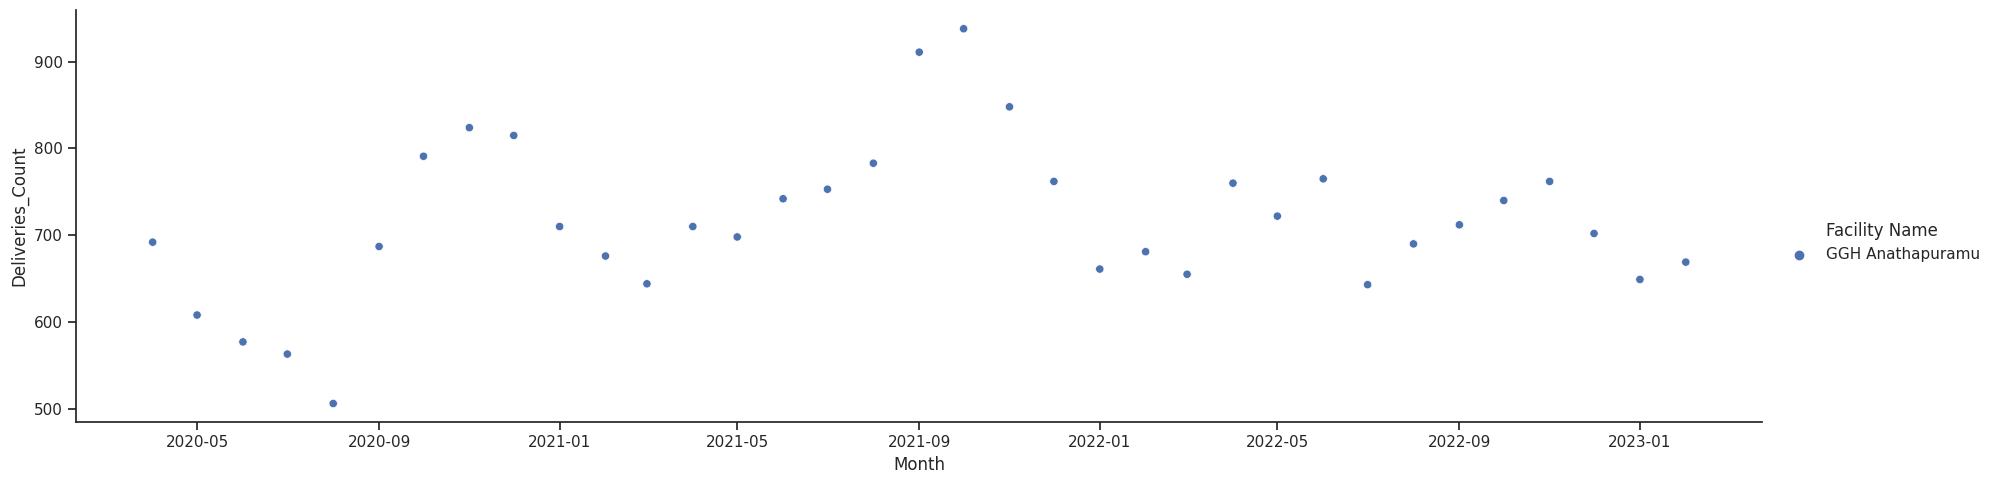

In [ ]:
final_Anak['Month'] = pd.to_datetime(final_Anak['Month'])
#plt.scatter(final_Anant['Month'],final_Anant['Deliveries_Count'],c=final_Anant['Facility Name'])
sns.relplot(data=final_Anak, x='Month', y='Deliveries_Count', hue='Facility Name',aspect=3.6)
plt.show()

<Axes: xlabel='Month'>

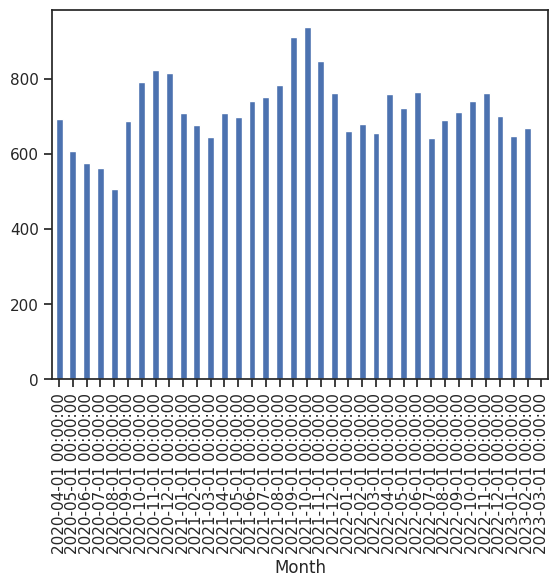

In [ ]:
#sns.barplot(data=final_Anak, x='Month', y='Deliveries_Count', hue='Facility Name',aspect=3.6)
#plt.show()
final_Anak.groupby('Month')['Deliveries_Count'].sum().plot.bar()

In [ ]:
final_Anak.groupby('Month')['Deliveries_Count'].sum()

Month
2020-04-01    692.0
2020-05-01    608.0
2020-06-01    577.0
2020-07-01    563.0
2020-08-01    506.0
2020-09-01    687.0
2020-10-01    791.0
2020-11-01    824.0
2020-12-01    815.0
2021-01-01    710.0
2021-02-01    676.0
2021-03-01    644.0
2021-04-01    710.0
2021-05-01    698.0
2021-06-01    742.0
2021-07-01    753.0
2021-08-01    783.0
2021-09-01    911.0
2021-10-01    938.0
2021-11-01    848.0
2021-12-01    762.0
2022-01-01    661.0
2022-02-01    681.0
2022-03-01    655.0
2022-04-01    760.0
2022-05-01    722.0
2022-06-01    765.0
2022-07-01    643.0
2022-08-01    690.0
2022-09-01    712.0
2022-10-01    740.0
2022-11-01    762.0
2022-12-01    702.0
2023-01-01    649.0
2023-02-01    669.0
2023-03-01      0.0
Name: Deliveries_Count, dtype: float64

In [ ]:
final_Anak = final_Anak[final_Anak['Deliveries_Count'].notnull()]
final_Anak = final_Anak.sort_values(by='Month').reset_index()

In [ ]:
final_Anak

,index,District,Facility Code,Facility Name,Month,Deliveries_Count,C-Section_Deliveries
0,753,Anantapur,451648.0,GGH Anathapuramu,2020-04-01,692.0,271.0
1,754,Anantapur,451648.0,GGH Anathapuramu,2020-05-01,608.0,237.0
2,755,Anantapur,451648.0,GGH Anathapuramu,2020-06-01,577.0,254.0
3,756,Anantapur,451648.0,GGH Anathapuramu,2020-07-01,563.0,232.0
4,757,Anantapur,451648.0,GGH Anathapuramu,2020-08-01,506.0,245.0
5,758,Anantapur,451648.0,GGH Anathapuramu,2020-09-01,687.0,265.0
6,759,Anantapur,451648.0,GGH Anathapuramu,2020-10-01,791.0,320.0
7,760,Anantapur,451648.0,GGH Anathapuramu,2020-11-01,824.0,385.0
8,761,Anantapur,451648.0,GGH Anathapuramu,2020-12-01,815.0,344.0
9,762,Anantapur,451648.0,GGH Anathapuramu,2021-01-01,710.0,317.0


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

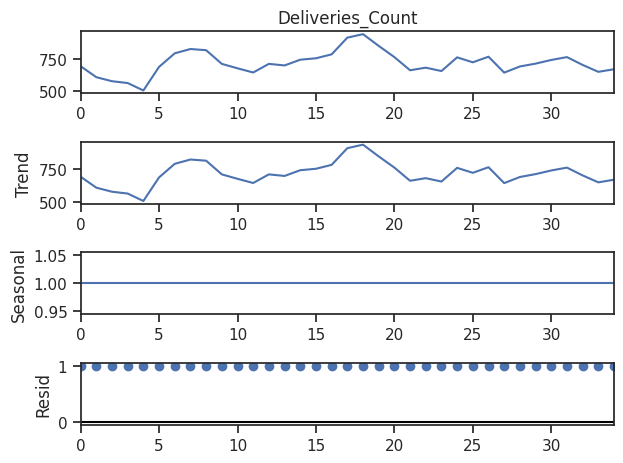

In [ ]:
# Decompose the data frame to get the trend, seasonality and noise
decompose_result = seasonal_decompose(final_Anak['Deliveries_Count'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

<Axes: title={'center': 'Holt Winters Single Exponential Smoothing grpah'}>

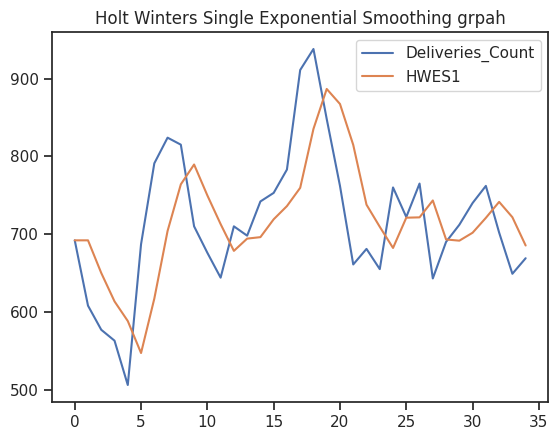

In [ ]:
# Set the value of Alpha and define x as the time period
alpha = 0.5
# Single exponential smoothing of the visitors data set
final_Anak['HWES1'] = SimpleExpSmoothing(final_Anak['Deliveries_Count']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
final_Anak[['Deliveries_Count','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

<Axes: title={'center': 'Holt Winters grapg: Additive Trend and Multiplicative Trend'}>

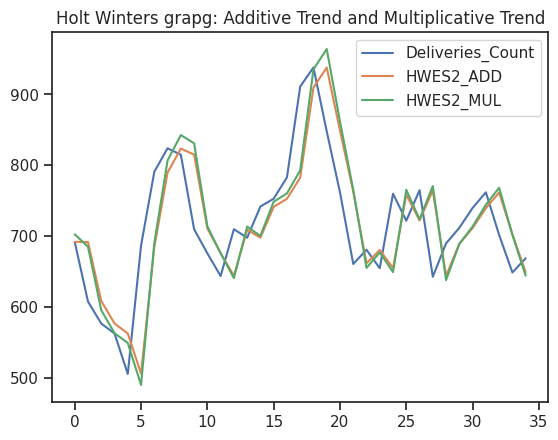

In [ ]:
# Double exponential smoothing of visitors data set ( Additive and multiplicative)
final_Anak['HWES2_ADD'] = ExponentialSmoothing(final_Anak['Deliveries_Count'],trend='add').fit().fittedvalues
final_Anak['HWES2_MUL'] = ExponentialSmoothing(final_Anak['Deliveries_Count'],trend='mul').fit().fittedvalues
final_Anak[['Deliveries_Count','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

In [ ]:
# Fit the model
fitted_model = ExponentialSmoothing(final_Anak['Deliveries_Count'],trend='mul',seasonal='add',seasonal_periods=7).fit()
test_predictions = fitted_model.forecast(8)

In [ ]:
test_predictions

35    676.520115
36    689.731963
37    682.193300
38    729.352227
39    704.063497
40    760.073636
41    735.129814
42    743.776186
dtype: float64

Text(0.5, 1.0, 'Original and Predicted data points using Holt Winters Exponential Smoothing')

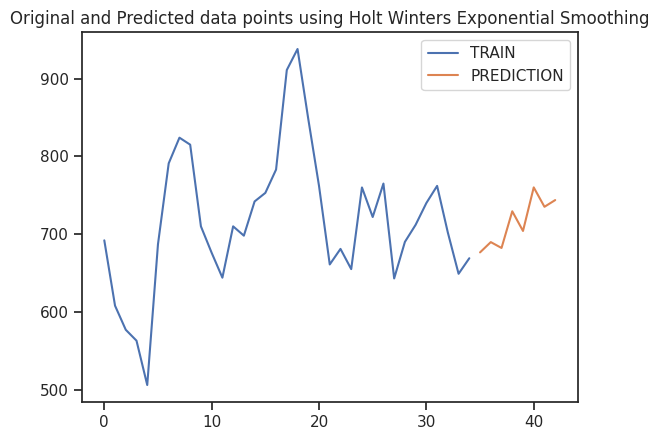

In [ ]:
final_Anak['Deliveries_Count'].plot(legend=True,label='TRAIN')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Original and Predicted data points using Holt Winters Exponential Smoothing')

In [ ]:
final_Anak

,index,District,Facility Code,Facility Name,Month,Deliveries_Count,C-Section_Deliveries,HWES1,HWES2_ADD,HWES2_MUL
0,753,Anantapur,451648.0,GGH Anathapuramu,2020-04-01,692.0,271.0,692.000000,692.226910,702.760113
1,754,Anantapur,451648.0,GGH Anathapuramu,2020-05-01,608.0,237.0,692.000000,691.927264,685.319037
2,755,Anantapur,451648.0,GGH Anathapuramu,2020-06-01,577.0,254.0,650.000000,608.820594,595.846973
3,756,Anantapur,451648.0,GGH Anathapuramu,2020-07-01,563.0,232.0,613.500000,577.179770,563.477317
4,757,Anantapur,451648.0,GGH Anathapuramu,2020-08-01,506.0,245.0,588.250000,562.959386,549.677363
5,758,Anantapur,451648.0,GGH Anathapuramu,2020-09-01,687.0,265.0,547.125000,506.401803,490.412066
6,759,Anantapur,451648.0,GGH Anathapuramu,2020-10-01,791.0,320.0,617.062500,684.808332,690.539113
7,760,Anantapur,451648.0,GGH Anathapuramu,2020-11-01,824.0,385.0,704.031250,789.784610,806.917483
8,761,Anantapur,451648.0,GGH Anathapuramu,2020-12-01,815.0,344.0,764.015625,823.659984,842.734071
9,762,Anantapur,451648.0,GGH Anathapuramu,2021-01-01,710.0,317.0,789.507812,815.152177,831.080786


<Axes: xlabel='Month'>

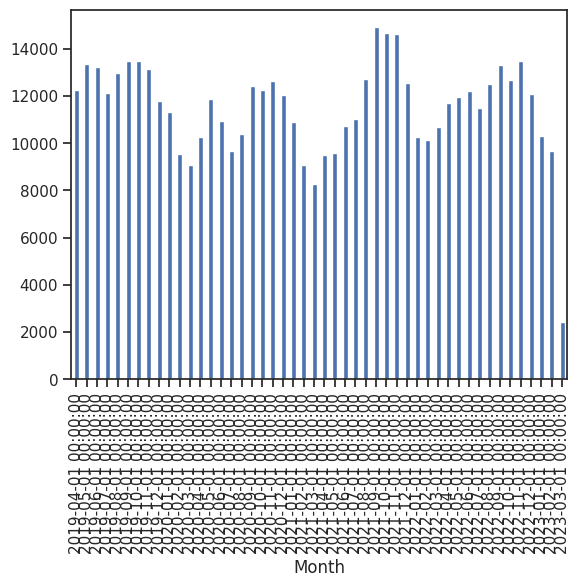

In [ ]:
final['Month'] = pd.to_datetime(final['Month'])
final_group = final.groupby('Month')['Deliveries_Count'].sum()
final.groupby('Month')['Deliveries_Count'].sum().plot.bar()

In [ ]:
final_group = final_group[:-1]

In [ ]:
final_group = pd.DataFrame(final_group)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Holt Winters Single Exponential Smoothing grpah'}, xlabel='Month'>

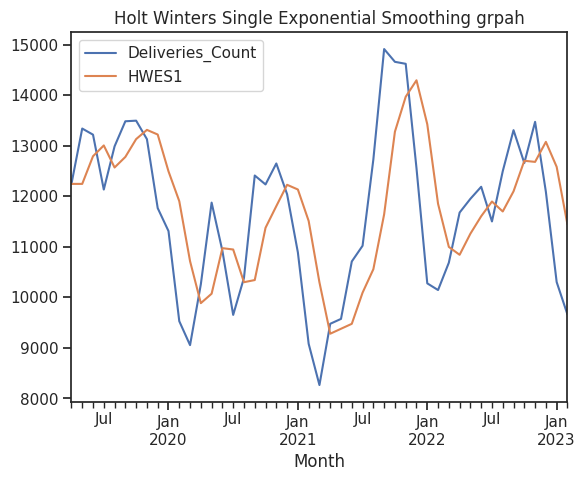

In [ ]:
# Set the value of Alpha and define x as the time period
alpha = 0.5
# Single exponential smoothing of the visitors data set
final_group['HWES1'] = SimpleExpSmoothing(final_group['Deliveries_Count']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
final_group[['Deliveries_Count','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Original and Predicted data points using Holt Winters Exponential Smoothing')

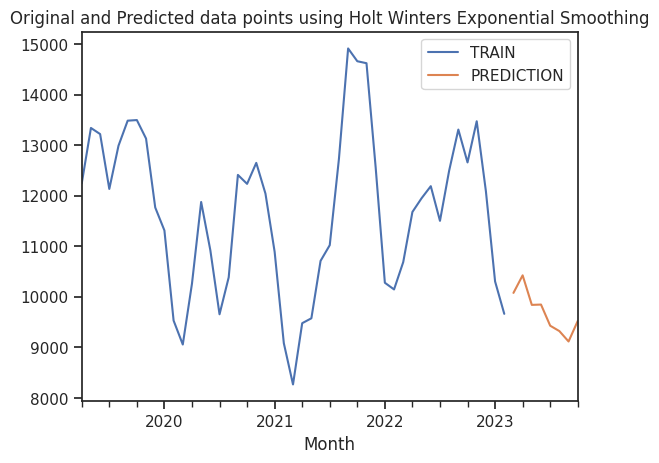

In [ ]:
# Fit the model
fitted_model = ExponentialSmoothing(final_group['Deliveries_Count'],trend='mul',seasonal='add',seasonal_periods=7).fit()
test_predictions = fitted_model.forecast(8)

final_group['Deliveries_Count'].plot(legend=True,label='TRAIN')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Original and Predicted data points using Holt Winters Exponential Smoothing')


In [ ]:
test_predictions

2023-03-01    10076.405483
2023-04-01    10424.103580
2023-05-01     9839.195763
2023-06-01     9845.570719
2023-07-01     9427.270540
2023-08-01     9320.623071
2023-09-01     9115.215113
2023-10-01     9521.190600
Freq: MS, dtype: float64

In [ ]:
facultycodes = [447466,450721,450708,451649,447465,447463,447471,451639,451642,451647]

In [ ]:
facultycodes = [447463]

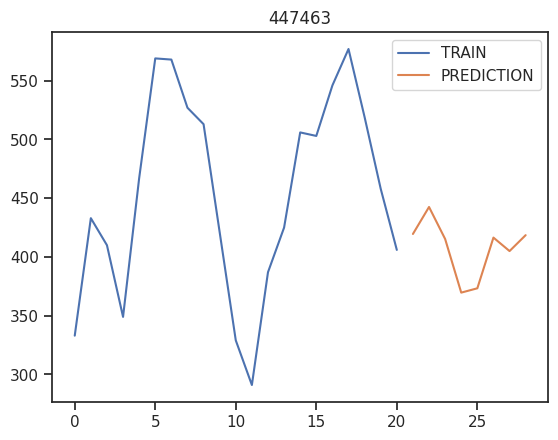

In [ ]:
import scipy
from scipy import stats

fac = []
pred = []
act = []

for i in facultycodes:
  temp = final[final['Facility Code']==i]
  temp = temp[temp['Month'] < "01-11-2022"]
  temp = temp[temp['Deliveries_Count'].notnull()]
  meandel = temp['Deliveries_Count'].mean()
  stddel = temp['Deliveries_Count'].std()
  temp = temp [(np.abs(stats.zscore((temp['Deliveries_Count']-meandel)/stddel)) < 2)]
  temp = temp[temp['Deliveries_Count']>35]
  temp = temp.sort_values(by='Month').reset_index()
  temp = temp[:-1]
  if(len(temp['Deliveries_Count'])>14):
    # Set the value of Alpha and define x as the time period
    alpha = 0.5
    # Single exponential smoothing of the visitors data set
    temp ['HWES1'] = SimpleExpSmoothing(temp ['Deliveries_Count']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
    #temp [['Deliveries_Count','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')
    fitted_model = ExponentialSmoothing(temp['Deliveries_Count'],trend='mul',seasonal='add',seasonal_periods=7).fit()
    test_predictions = fitted_model.forecast(8)
    fac.append(i)
    pred.append(test_predictions)
    act.append(temp['Deliveries_Count'])
    temp['Deliveries_Count'].plot(legend=True,label='TRAIN')
    test_predictions.plot(legend=True,label='PREDICTION')
    plt.title(i)


In [ ]:
final['Facility Code']

0               451648.0
1               451648.0
2               451648.0
3               451648.0
4               451648.0
              ...       
1378              447466
1379              447466
1380                 NaN
1381            Category
1382    Selected Period 
Name: Facility Code, Length: 1383, dtype: object

In [ ]:
#for i in len(fac):
z= pd.DataFrame(pred[1]).reset_index()
z.head(5)

IndexError: ignored

In [ ]:
forecast = pd.DataFrame(columns = ['Index','Actual','Predicted','Facility_Code'])

for i in range(len(fac)):
  rev = pd.DataFrame(pd.concat([act[i],pred[i]],axis=1)).reset_index()
  rev.columns= ['Index','Actual','Predicted']
  rev['Facility_Code'] = fac[i]
  frames = [forecast,rev]
  forecast = pd.concat(frames,ignore_index=True)

In [ ]:
forecast.head(6)